# COVID-19 cases in Japan by prefecture (47 prefectures)
In this project, I'm going to analyze the correlationship between population (& population density) and the number of positive COVID-19 cases in Japan, by prefecture. (Japan has 47 prefectures.Tokyo is one of them.) <br>
<br>
I will only focus on the total COVID-19 patients by prefecture, not on changes in the trend at daily or weekly basis.

## Data source
Source: ./covid-19-japan-2022-01-04.csv <br>

The csv file can be downloaded from https://www.stopcovid19.jp/tableview.html. <br>
This is a portal website for COVID-19 run by the Japanese governmental organization. <br>
There is no potential for personally identifiable distinctions as it only contains data 'by prefecture'.

## Data modification
By passing "thousands=','" parameters, I will treat "npopulation" & "area" columns as int64 (the original not string object) so that they can be easily sorted for analysis. Also, even though the csv file has columns for # deaths or # current patients (who are not recovered yet), I will not focus on those data.

In [204]:
# import modules
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np

# read the csv file
df = pd.read_csv(
    './covid-19-japan-2022-01-04.csv', 
    thousands=',',
    usecols=['name', 'ntotalpatients', 'npopulation', 'areainkm^2'])

## table sorted by # covid-19 patients
This table shows that top 10 prefectures for COVID-19 patients (positive) cases are: <br>
Tokyo, Osaka, Kanagawa, Saitama, Aichi, Chiba, Hyogo, Fukuoka, Hokkaido and Okinawa.

In [242]:
df_num_patients = df.sort_values(by=['ntotalpatients'], ascending=False) 
# sort by # total patients
df_num_patients.reset_index(drop=True, inplace=True)
df_num_patients.index = np.arange(1, len(df)+1)
df_num_patients.index.name = '#_patients_rank'
# indexing from 1 & changing the index name for better readability

df_num_patients['#_patients_rank'] = df_num_patients.index
# creating another column for when this df is merged with the another one
# df_num_patients["#_patients_rank"] = df_num_patients["#_patients_rank"] .astype(str)
df_num_patients

,name,ntotalpatients,npopulation,areainkm^2,populationdensity,#_patients_rank
#_patients_rank,,,,,,
1,Tokyo,383495,13159000,2104,6254.277567,1
2,Osaka,204120,8865000,1901,4663.335087,2
3,Kanagawa,169960,9048000,2416,3745.033113,3
4,Saitama,116175,7195000,3768,1909.501062,4
5,Aichi,106840,7411000,5116,1448.592651,5
6,Chiba,100779,6216000,5082,1223.140496,6
7,Hyogo,78927,5588000,8396,665.555026,7
8,Fukuoka,74842,5072000,4847,1046.420466,8
9,Hokkaido,61576,5506000,83457,65.974094,9


## table sorted by # population 
This table shows that top 10 prefectures for population are: <br>
Tokyo, Osaka, Kanagawa, Saitama, Aichi, Chiba, Hyogo, Fukuoka, Hokkaido and Okinawa.

In [250]:
df_num_population = df.sort_values(by=['npopulation'], ascending=False)
# sort by # population
df_num_population.reset_index(drop=True, inplace=True)
df_num_population.index = np.arange(1, len(df)+1)
df_num_population.index.name = '#_population'
# indexing from 1 & changing the index name for better readability
df_num_population['#_population_rank'] = df_num_population.index
df_num_population

,name,ntotalpatients,npopulation,areainkm^2,populationdensity,#_population_rank
#_population,,,,,,
1,Tokyo,383495,13159000,2104,6254.277567,1
2,Kanagawa,169960,9048000,2416,3745.033113,2
3,Osaka,204120,8865000,1901,4663.335087,3
4,Aichi,106840,7411000,5116,1448.592651,4
5,Saitama,116175,7195000,3768,1909.501062,5
6,Chiba,100779,6216000,5082,1223.140496,6
7,Hyogo,78927,5588000,8396,665.555026,7
8,Hokkaido,61576,5506000,83457,65.974094,8
9,Fukuoka,74842,5072000,4847,1046.420466,9


## Merged table: Correlationship between # patients & # population
Here's a top 10 prefectures for # COVID-19 patients (positive cases). <br>
We can see that prefectures that are in from the 1st place to 9th place for population are also ranked similarly for COVID-19 patients. <br>
<br>
The only exception is __Okinawa__ (10th place for # patients but 30th place for population). <br>
There are multiple reasons that have caused this. <br>
<br>
One of them is the fact that Okinawa is one of the most popular destination for domestic tourism. According to [JTB] (https://www.jtb.or.jp/wp-content/uploads/2020/10/nenpo2020_1-2.pdf), Okinawa was 4th most popular destination for domestic tourists after Tokyo, Osaka and Hokkaido in 2019. Therefore, there may be possibility that domestic tourists travelled to Okinawa more than to the other prefectures and it caused Okinawa is ranked in the 10th place.<br>
<br>
I will have a look at another perspective later in this analysis in __the popluation density__ section.<br>

In [251]:
merged_df_npatients_npop = pd.merge(df_num_patients, df_num_population)
# merge two dfs 
merged_df_npatients_npop.reset_index(drop=True, inplace=True)
merged_df_npatients_npop.index = np.arange(1, len(df)+1)
# indexing from 1 for better readability
merged_df_npatients_npop.head(10)
# showing top 10 prefectures

,name,ntotalpatients,npopulation,areainkm^2,populationdensity,#_patients_rank,#_population_rank
1,Tokyo,383495,13159000,2104,6254.277567,1,1
2,Osaka,204120,8865000,1901,4663.335087,2,3
3,Kanagawa,169960,9048000,2416,3745.033113,3,2
4,Saitama,116175,7195000,3768,1909.501062,4,5
5,Aichi,106840,7411000,5116,1448.592651,5,4
6,Chiba,100779,6216000,5082,1223.140496,6,6
7,Hyogo,78927,5588000,8396,665.555026,7,7
8,Fukuoka,74842,5072000,4847,1046.420466,8,9
9,Hokkaido,61576,5506000,83457,65.974094,9,8
10,Okinawa,51120,1393000,2277,611.769873,10,30


## Scatter: correlationship between # patients and # population in Japan by prefecture 
We can see a correlationship between # patients and # population. <br>
The more population a prefecture has (x axis), the more # COVID-19 patients it is likely to have.

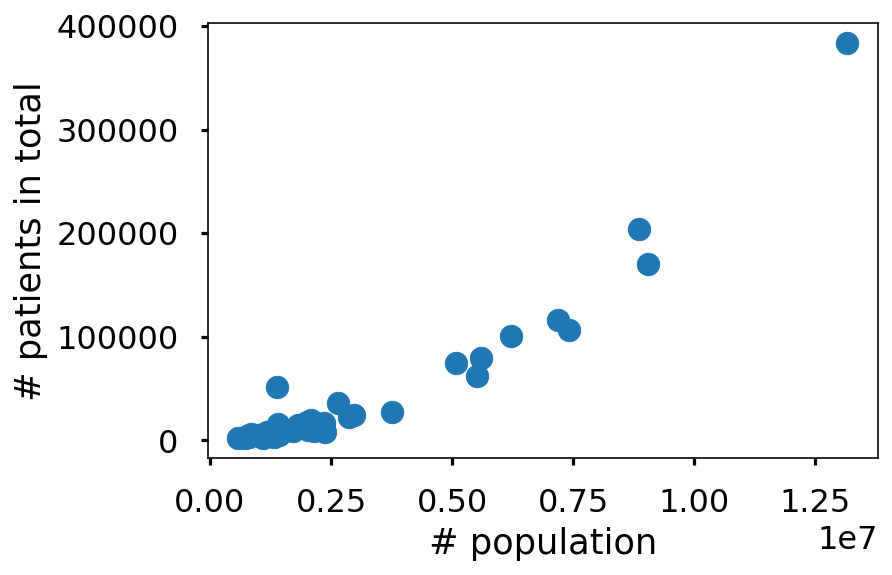

In [206]:
df = df.sort_values(by=['ntotalpatients'], ascending=False)
plt.ylabel("# patients in total")
plt.xlabel("# population")
plt.scatter(df['npopulation'],df['ntotalpatients'])

## correlationship between # patients and # population density in Japan by prefecture 
Another perspective which is worth having look at will be __population density__ (not just # population). <br>
This may have a clearer correlationship than # population as we don't see an exception like Okinawa as we did in the other table. 

In [252]:
df_pop_density = df
df_pop_density['populationdensity'] = (df_pop_density['npopulation']/df_pop_density['areainkm^2'])
df_pop_density = df_pop_density.sort_values(by=['populationdensity'], ascending=False)
df_pop_density.reset_index(drop=True, inplace=True)
df_pop_density.index = np.arange(1, len(df)+1)
df_pop_density['population_density_rank'] = df_pop_density.index

merged_df_popdensity_num_patients = pd.merge(df_pop_density, df_num_patients)
merged_df_popdensity_num_patients.reset_index(drop=True, inplace=True)
merged_df_popdensity_num_patients.index = np.arange(1, len(df)+1)
merged_df_popdensity_num_patients.head(10)

,name,ntotalpatients,npopulation,areainkm^2,populationdensity,population_density_rank,#_patients_rank
1,Tokyo,383495,13159000,2104,6254.277567,1,1
2,Osaka,204120,8865000,1901,4663.335087,2,2
3,Kanagawa,169960,9048000,2416,3745.033113,3,3
4,Saitama,116175,7195000,3768,1909.501062,4,4
5,Aichi,106840,7411000,5116,1448.592651,5,5
6,Chiba,100779,6216000,5082,1223.140496,6,6
7,Fukuoka,74842,5072000,4847,1046.420466,7,8
8,Hyogo,78927,5588000,8396,665.555026,8,7
9,Okinawa,51120,1393000,2277,611.769873,9,10
10,Kyoto,36278,2636000,4613,571.428571,10,11


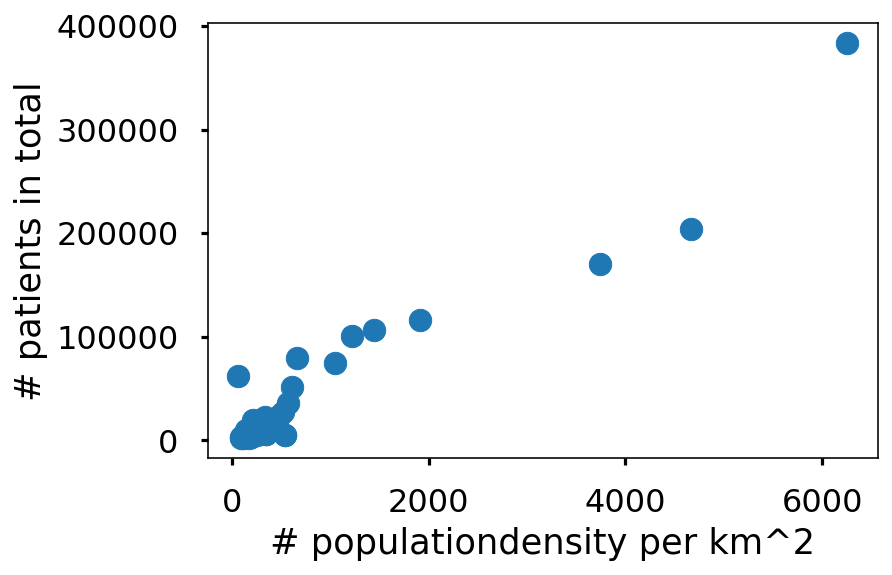

In [262]:
plt.ylabel("# patients in total")
plt.xlabel("# populationdensity per km^2")
plt.scatter(df_pop_density['populationdensity'],df_pop_density['ntotalpatients'])

### Exception: Hokkaido population density - 47th place, # patients 9th 
However, there's still an exception in the scatter map, which is Hokkaido. Even though its population density is in the 47th place (best/worst), it is in the 9th place for # patients. This may be becuase its unique charactaristics: __Hokkaido has 22% of whole the area of the country with only 4% of the national poplulation.__ <br>
<br>
In addition, its capital city Sapporo has almost 2 million population, which is more than 40% of the prefectual population. These charactaristic caused the exception in the table. It'd be interesting to see compare COVID-19 patients data between cities focusing on population density.

In [261]:
merged_df_popdensity_num_patients.tail(1)


,name,ntotalpatients,npopulation,areainkm^2,populationdensity,population_density_rank,#_patients_rank
47,Hokkaido,61576,5506000,83457,65.974094,47,9
